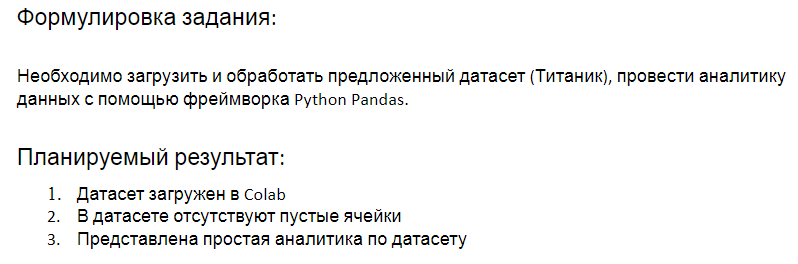

In [236]:
import pandas as pd # подключаем библиотеку Pandas

In [237]:
titanic = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', delimiter=',') # Читаем датасет Titanic-Dataset.csv с Google диска

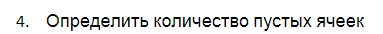

In [238]:
# Определяем количество пустых ячеек по столбцам (признакам)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [239]:
# Определяем общее количество пустых ячеек
number_of_empty_cells = titanic.isnull().sum().sum()
print("Количество пустых ячеек:", number_of_empty_cells)

Количество пустых ячеек: 866


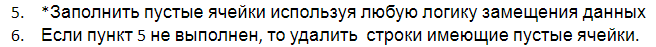

In [240]:
# Заменяем пустые значения в столбце Age (возраст)
Average_age = round(titanic['Age'].mean()) # считаем среднее арифметическое значение по столбцу Age (возраст) и округляем значение до целого
titanic['Age'].fillna(Average_age, inplace = True) # Заменяем пустые значения округленным средним арифметическим

In [241]:
# Предположим, что значения столбца Cabin (номер каюты) не потребуются нам для анализа
titanic.drop(columns = 'Cabin', axis = 1, inplace = True) # Удаляем столбец Cabin (номер каюты)

In [242]:
# Удаляем все оставшиеся строки с пустыми ячейками из датасета
titanic.dropna(inplace = True) # Удаляем все строки с пустыми ячейками из датасета (2 пустые ячейки - в столбце Embarked (порт посадки))

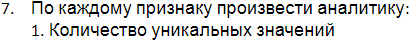

In [243]:
# Считаем количество уникальных значений по признакам (столбцам)
unique_values = titanic.nunique ()
print (unique_values)

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64


image.png

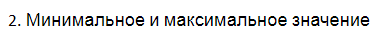

In [244]:
# Выводим минимальные значения по признакам (столбцам)
min_column = titanic.min()
print(min_column)

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Embarked                         C
dtype: object


In [245]:
# Выводим максимальные значения по признакам (столбцам)
max_column = titanic.max()
print(max_column)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Embarked                                 S
dtype: object


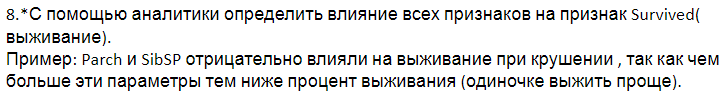

In [246]:
def calculate_percentage_survivors(number_total, number_survivors):
  '''Функция считает и выводит на экран процен выживших'''
  percentage_survivors = round((number_survivors / number_total * 100), 2) # Считаем процент выживших и округляем до 2-го знака после запятой
  print(f'''Всего: {number_total}
Выжило: {number_survivors}
Процент выживших: {percentage_survivors}%''')

In [247]:
def calculate_quantity(column_name, value):
  '''Функция считает и выводит на экран общее количество, колличество выживших пасажиров с определённым признаком и процент выживших использую функцию calculate_percentage_survivors()'''
  total = len(titanic[titanic[column_name]==value]) # Считаем общее количество
  survivor = len(titanic[(titanic['Survived']==1) &(titanic[column_name]==value)]) # Считаем количество выживших
  percentage_survivors = calculate_percentage_survivors(total, survivor) # Считаем процент выживших
  print(percentage_survivors)

In [248]:
calculate_quantity('Sex', 'male') # Считаем процент выживших мужчин

Всего: 577
Выжило: 109
Процент выживших: 18.89%
None


In [249]:
calculate_quantity('Sex', 'female') # Считаем процент выживших женщин

Всего: 312
Выжило: 231
Процент выживших: 74.04%
None


**Вывод: у мужчин шанс выжить более чем на 50 процентов меньше чем у женщин.**

In [250]:
calculate_quantity('Pclass', 1) # Считаем процент выживших пассажиров 1-го класса

Всего: 214
Выжило: 134
Процент выживших: 62.62%
None


In [251]:
calculate_quantity('Pclass', 2) # Считаем процент выживших пассажиров 2-го класса

Всего: 184
Выжило: 87
Процент выживших: 47.28%
None


In [252]:
calculate_quantity('Pclass', 3) # Считаем процент выживших пассажиров 3-го класса

Всего: 491
Выжило: 119
Процент выживших: 24.24%
None


**Вывод: чем выше класс круиза тем больше шансов выжить.**

In [253]:
calculate_quantity('Embarked', 'C') # Считаем процент выживших пассажиров, совершивших посадку в порту "C"

Всего: 168
Выжило: 93
Процент выживших: 55.36%
None


In [254]:
calculate_quantity('Embarked', 'Q') # Считаем процент выживших пассажиров, совершивших посадку в порту "Q"

Всего: 77
Выжило: 30
Процент выживших: 38.96%
None


In [255]:
calculate_quantity('Embarked', 'S') # Считаем процент выживших пассажиров, совершивших посадку в порту "S"

Всего: 644
Выжило: 217
Процент выживших: 33.7%
None


**Вывод: лучше совершать посадку в порту "C"**